# Tarea 1. Programación

3. Escriba una clase con las siguientes funcionalidades:
    * Al instanciar un objeto, lee un conjunto de datos numéricos. Por ejemplo puede usar el mismo conjunto de datos iris.csv. Instancie los datos en un dataframe de Pandas.
    * Implemente un método que calcule las estadísticas descriptivas básicas de cada una de las variables (sepal.length, sepal.width, petal.length, etc)
    * Implemente un método que entregue los nombre de las variables disponibles.
    * Implemente un método que reciba el nombre de una variable disponible dentro del objeto (en el dataframe) y regrese: sus estadísticas básicas: media, mediana, desviación, percentiles q25, q50, q75 y dibuje un histograma de la distribución de la variable.


In [1]:
#Librerias
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
#Objeto
class Statistical:
    def __init__(self,DataName):
        '''DataName: String con la dirección y nombre 
                     del csv que se desea utilizar.
           El archivo CSV debe tener una columna inicial
           con el Id.
           Se crean dos data frames de pandas, uno con
           los datos originales y otro solo con los datos
           numéricos.
           '''
        #Se guardan los datos en el objeto, separando los 
        #numéricos de los originales
        self.data  = pd.read_csv(DataName)
        self.NData = pd.read_csv(DataName)._get_numeric_data()
        
        #Se borra los datos de Id
        self.NData.drop(self.NData.columns[0],axis=1,inplace= True)

        #Se guarda la cantidad de datos en el objeto
        self.LenData = len(self.data) 
        

    def BasicStatistics(self):
        '''Este método realiza la estadistica basica de las
           variables númericas y las guarda en un Data frame'''
        #Se encuentra el nombre de las columnas
        LNames = self.Name()
        #Se crea un dataframe nuevo
        self.Statistics = pd.DataFrame()
        
        #Se realiza la estadistica por culumna y se agregan los datos
        for name in LNames:
            DataArray = self.NData[name]
            
            media   = DataArray.mean()
            mediana = DataArray.median()
            q25     = DataArray.quantile(0.25)
            q75     = DataArray.quantile(0.75)
            Min     = np.min(DataArray)
            Max     = np.amax(DataArray)

            self.Statistics[name] = [media,mediana,q25,q75,Min,Max]
        #Filas del data Frame 
        self.Statistics.index = ['media','mediana','q25',
                                 'q75','Minimo','Máximo']
        return self.Statistics
    
    def Name(self):
        '''Este método Devuelve una lista con los nombres
           de las variables númericas en el data frame'''
        
        self.columns_names = self.NData.columns.values
        return self.columns_names
        
    def GE(self,name):
        ''' name: Nombre de la varibale numérica
            Este método pide el nombre de la variable
            que se desea utilizar y devuelve la estadistica
            de la variable y un histograma del mismo.'''
        

        #Se guarda la estadistica de la variable de interes
        self.OneData = self.BasicStatistics()[name]
        
        
        #Se crea el hisgroma
        fig, ax = plt.subplots()
        ax.hist(self.NData[name], color = "Darkred")
        ax.set_xlabel('valores numéricos')
        ax.set_ylabel('Frecuencia')
        ax.set_title(name)
        
        #Se devuelve la estadistica y el histograma
        return self.OneData, plt.show(fig)

In [2]:
#Ruta del DataFrame y creación de objeto
ruta = '/home/pater/Desktop/CosasPater/UNAL/2023-02NovenoSemestre/IA/StatisticalObject/Iris.csv'
ClassData = Statistical(ruta)
ClassData.NData

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
#Se observa la estadistica de las variables numéricas
ClassData.BasicStatistics()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
media,5.843333,3.054,3.758667,1.198667
mediana,5.800000,3.000,4.350000,1.300000
q25,5.100000,2.800,1.600000,0.300000
q75,6.400000,3.300,5.100000,1.800000
Minimo,4.300000,2.000,1.000000,0.100000
Máximo,7.900000,4.400,6.900000,2.500000


In [4]:
#Se imprimen la lista con los nombres de las variables
ClassData.Name()

array(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
      dtype=object)

---
## Estadística de las variables numéricas 

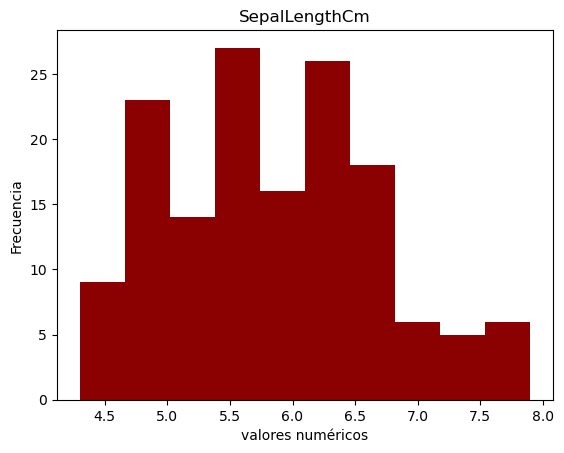

(media      5.843333
 mediana    5.800000
 q25        5.100000
 q75        6.400000
 Minimo     4.300000
 Máximo     7.900000
 Name: SepalLengthCm, dtype: float64,
 None)

In [5]:
ClassData.Name()
names = ClassData.columns_names
ClassData.GE(names[0])

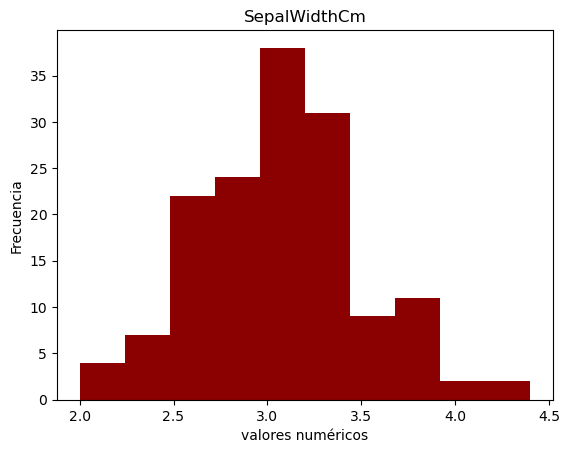

(media      3.054
 mediana    3.000
 q25        2.800
 q75        3.300
 Minimo     2.000
 Máximo     4.400
 Name: SepalWidthCm, dtype: float64,
 None)

In [6]:
ClassData.Name()
names = ClassData.columns_names
ClassData.GE(names[1])

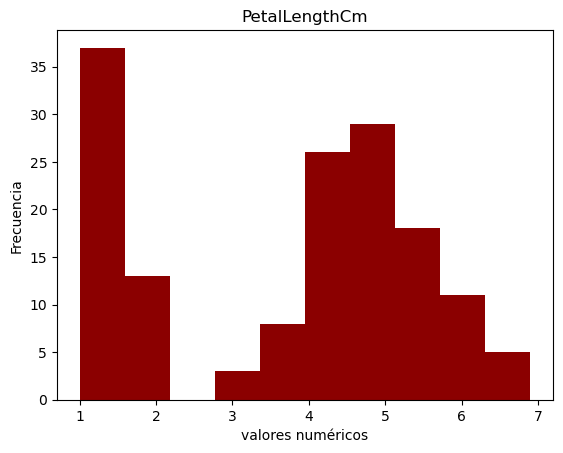

(media      3.758667
 mediana    4.350000
 q25        1.600000
 q75        5.100000
 Minimo     1.000000
 Máximo     6.900000
 Name: PetalLengthCm, dtype: float64,
 None)

In [7]:
ClassData.Name()
names = ClassData.columns_names
ClassData.GE(names[2])

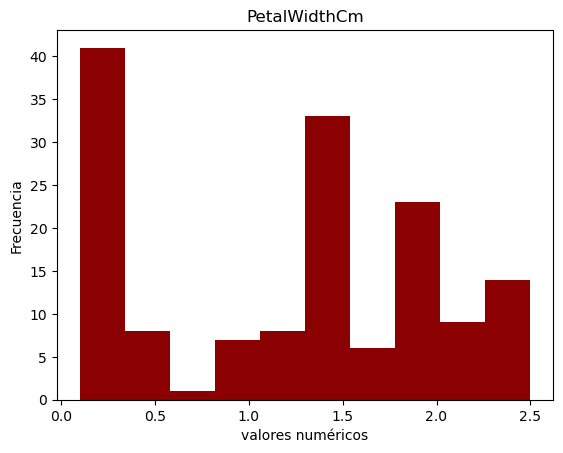

(media      1.198667
 mediana    1.300000
 q25        0.300000
 q75        1.800000
 Minimo     0.100000
 Máximo     2.500000
 Name: PetalWidthCm, dtype: float64,
 None)

In [8]:
ClassData.Name()
names = ClassData.columns_names
ClassData.GE(names[3])